# Enkelt potensial
Målet er å simulere diffusjon i eit enkelt potensial

$$ V(x) = kx $$

for ein konstant $k$.

In [6]:
import matplotlib as mpl

# nice big latex-flavored plots
# if you don't have these fonts, or you don't have
# XeLaTeX installed, this needs to be modified.
fontsize = 20
newparams = {
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'lines.linewidth': 2, 
    'lines.markersize': 7,
    'text.usetex': True,
    'font.family': "serif",
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": True,
    'figure.figsize': (16,16), 
    'ytick.labelsize': fontsize,
    'xtick.labelsize': fontsize,
    'legend.fontsize': fontsize,
    'legend.handlelength': 1.5,
    'xtick.major.pad': 8,
    'ytick.major.pad': 8,
}

# !!!
# for some reason, on some machines, you need to run this cell twice
# it probably has something to do with python versions or something
# !!!
%matplotlib inline

# makes mpl use the pgf-renderer. sometimes (but not on all machines)
# this disables rendering in the notebook.
# if this happens on your machine, maybe use
# another backend while working, and switch
# to pgf when you want to generate the final plots.

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# right angles never hurt anyone,
# so use classic as a base theme
plt.style.use('classic')
# the gray border is not visible in the plot rendered
# by plt.savefig, so dont't  worry about that

# finally change the necessary parameters
plt.rcParams.update(newparams)

# pretty-print sympy things
sp.init_printing()

In [2]:
import scipy as scp
import scipy.constants as const
k_B = const.Boltzmann

Det er oppgitt at $k\beta$ er mellom $3$ og $5$.

In [8]:
temp = 300
beta = 1 / (k_B * temp)
k = 3 / beta

# step length
h = 0.5

def V(x): return k * x

def P_r(x):
    r = np.exp(-beta * (V(x - h) - V(x + h)))
    return 1 / (1 + r)

def steps(xs):
    rng = np.random.random(xs.shape)
    return h * np.where(rng < P_r(xs), 1, -1)

Gitt $x$-verdiane kan vi beregne alle $P_R(x)$-verdiane.
Desse verdiane brukar vi for å ta steg tilfeldig.

In [9]:
# start parameters: N = #particles, T = #steps
N = 100000
T = 500

plot_ts = [50, 125, 250, 500]

# N partiklar i origo
pos = np.zeros(N)

phi = dict()

for t in range(T + 1):
    pos += steps(pos)
    if t in plot_ts:
        phi[t] = np.copy(pos)

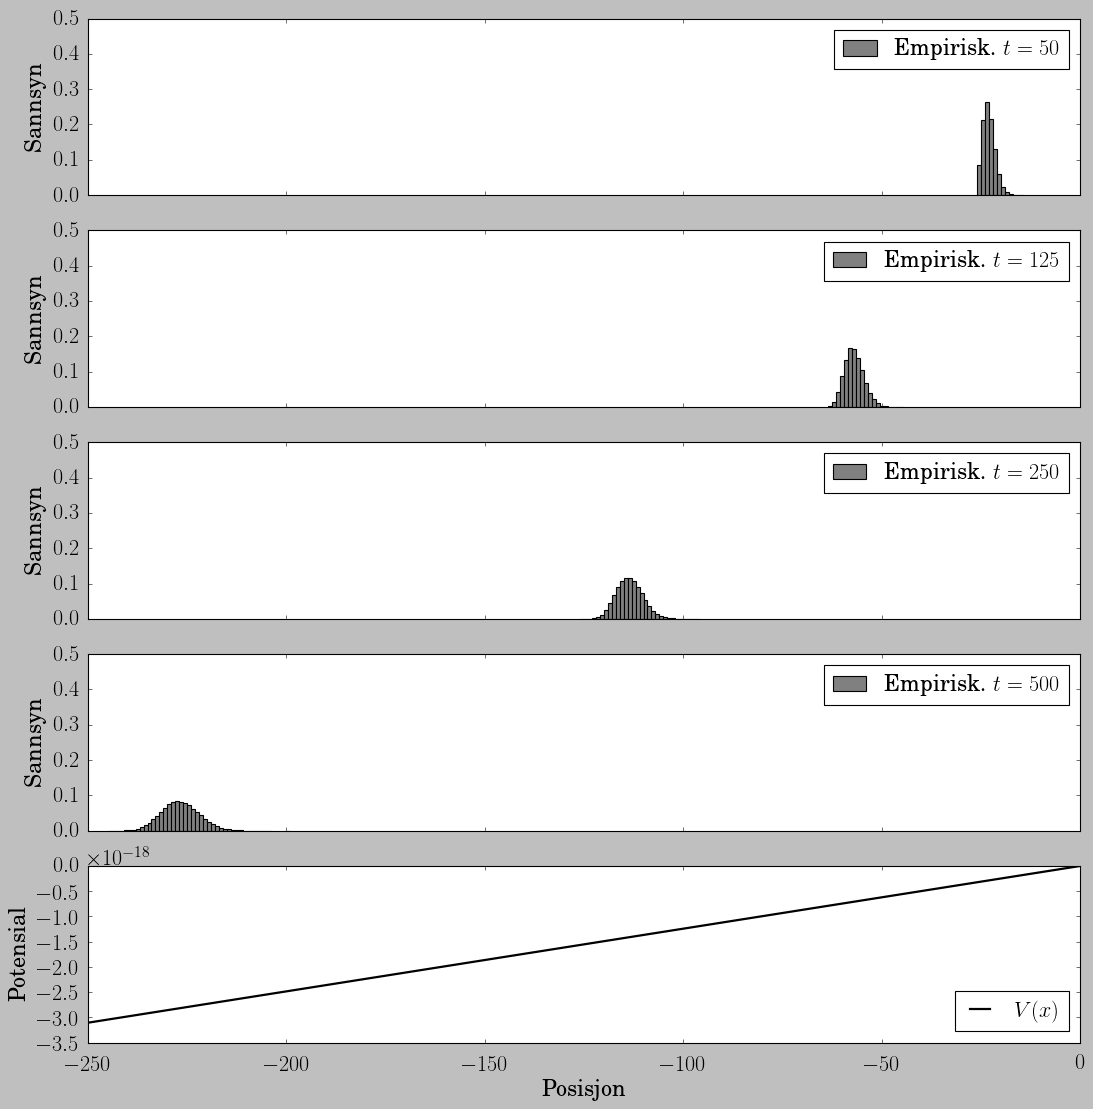

In [10]:
fig = plt.figure()
axes = fig.subplots(1 + len(plot_ts), 1, sharex=True)

ylim = (0, .5)

### plot 1
for i, t in enumerate(plot_ts):
    unique, count = np.unique(phi[t], return_counts=True)
    axes[i].bar(
        unique, count / N,
        edgecolor="black",
        color='gray',
        width=2*h,
        align='center',
        label='Empirisk. $t = {}$'.format(t),
    )

    axes[i].set_ylim(*ylim)
    axes[i].set_ylabel(r"Sannsyn")  
    axes[i].legend(loc='upper right')


### plot 2
xmin, xmax = plt.xlim()
xs = np.linspace(xmin, xmax, 250)
axes[-1].plot(xs, V(xs), 'k', label="$V(x)$")
axes[-1].set_ylabel(r"Potensial")
axes[-1].legend(loc='lower right')

plt.xlabel(r"Posisjon")

plt.savefig("walk_5_1.pdf")